In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.stats
import seaborn as sns
from glob import glob
from zimp.readability.winnetka import WinnetkaScore

plt.style.use('seaborn-whitegrid')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package perluniprops to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package perluniprops is already up-to-date!


In [2]:
def get_ds_language(ds):
    if ds in ['10K-GNAD', 'GERMEVAL-2018', 'GERMEVAL-2020']:
        return 'german'
    return 'english'

def get_train_texts(ds_path, dataset):
    if 'train.csv' in ds_path:
        return dataset.text
    ds_path = ds_path.replace('test', 'train')
    return pd.read_csv(ds_path).text

source_dir = '../../zimp_orchestrator/orch/resources'
rs = []
df_confs = {}
score = 'winnetka'

for file in glob('confidence/confidence*.csv'):
    dataset =  file.split('_')[-2]
    train_test = file.split('_')[-1].split('.')[0]
    source_file = os.path.join(source_dir, dataset, train_test + '.csv')
    df_conf = pd.read_csv(file)
    df_text = pd.read_csv(source_file)
    train_texts = get_train_texts(source_file, df_text)
    lang = get_ds_language(file.split('_')[-2])
    scorer = WinnetkaScore(language=lang)
    
    print(f'Analyzing {file} for score {score}')
    file_path = f'winnetka/{"_".join(file.split("_")[-2:])}'
    if os.path.exists(file_path):
        df_conf[score] = pd.read_csv(file_path)
    else:
        df_conf[score] = scorer.get_scores(df_text.text)
        df_conf[score].to_csv(file_path, index=False)
    rs.append({
        'pearson_p_true': scipy.stats.pearsonr(df_conf['p_true'], df_conf[score])[0],
        'spearman_p_true': scipy.stats.spearmanr(df_conf['p_true'], df_conf[score])[0],
        'pearson_conf': scipy.stats.pearsonr(df_conf['mean'], df_conf[score])[0],
        'spearman_conf': scipy.stats.spearmanr(df_conf['mean'], df_conf[score])[0],
        'model': '_'.join(file.split('_')[1:-2]),
        'dataset': dataset,
        'train_test': train_test,
        'language': lang,
        'score': score
    })

    df_confs['_'.join(file.split('_')[1:])[:-4]] = df_conf
    
df_corr = pd.DataFrame(rs)
df_corr

Analyzing confidence\confidence_BERT_DBP-14_test.csv for score winnetka
Analyzing confidence\confidence_BERT_DBP-14_train.csv for score winnetka
Analyzing confidence\confidence_BERT_TREC-6_test.csv for score winnetka
Analyzing confidence\confidence_BERT_TREC-6_train.csv for score winnetka
Analyzing confidence\confidence_BERT_YELP-5_test.csv for score winnetka
Analyzing confidence\confidence_BERT_YELP-5_train.csv for score winnetka
Analyzing confidence\confidence_DECISION_TREE_10K-GNAD_test.csv for score winnetka
Analyzing confidence\confidence_DECISION_TREE_10K-GNAD_train.csv for score winnetka
Analyzing confidence\confidence_DECISION_TREE_DBP-14_test.csv for score winnetka
Analyzing confidence\confidence_DECISION_TREE_DBP-14_train.csv for score winnetka
Analyzing confidence\confidence_DECISION_TREE_GERMEVAL-2018_test.csv for score winnetka
Analyzing confidence\confidence_DECISION_TREE_GERMEVAL-2018_train.csv for score winnetka
Analyzing confidence\confidence_DECISION_TREE_GERMEVAL-202

,pearson_p_true,spearman_p_true,pearson_conf,spearman_conf,model,dataset,train_test,language,score
0,0.034174,0.039550,0.058537,0.133955,BERT,DBP-14,test,english,winnetka
1,0.028873,0.035679,0.055261,0.130098,BERT,DBP-14,train,english,winnetka
2,0.055585,0.091189,0.019710,0.015166,BERT,TREC-6,test,english,winnetka
3,0.024622,0.021919,0.014737,0.007550,BERT,TREC-6,train,english,winnetka
4,-0.040160,-0.038249,-0.117809,-0.127379,BERT,YELP-5,test,english,winnetka
5,-0.029707,-0.022202,-0.092436,-0.087029,BERT,YELP-5,train,english,winnetka
6,0.008579,-0.004548,-0.065615,-0.077623,DECISION_TREE,10K-GNAD,test,german,winnetka
7,-0.006877,-0.010929,-0.061361,-0.065432,DECISION_TREE,10K-GNAD,train,german,winnetka
8,-0.001584,0.006261,-0.082047,-0.032915,DECISION_TREE,DBP-14,test,english,winnetka
9,0.005113,0.013408,-0.077308,-0.029519,DECISION_TREE,DBP-14,train,english,winnetka


In [4]:
for score in df_corr.score.unique():
    print(score) 
    print(df_corr[df_corr.score == score][['pearson_p_true', 'spearman_p_true', 'pearson_conf', 'spearman_conf']].mean())
    print('-'*20)

winnetka
pearson_p_true    -0.001502
spearman_p_true   -0.000671
pearson_conf       0.005434
spearman_conf      0.012777
dtype: float64
--------------------


In [5]:
for score in df_corr.score.unique():
    df_sc = df_corr[df_corr.score == score]
    df_model_corr = df_sc.groupby(['model'])[['pearson_p_true', 'spearman_p_true', 'pearson_conf', 'spearman_conf']].mean()
    print(score)
    print(df_model_corr)
    print('-'*20)

winnetka
               pearson_p_true  spearman_p_true  pearson_conf  spearman_conf
model                                                                      
BERT                 0.012231         0.021314     -0.010333       0.012060
DECISION_TREE        0.000234         0.000545     -0.030450      -0.025719
FASTTEXT             0.027497         0.025723      0.080701       0.106308
GERMAN_BERT         -0.006120        -0.009677      0.014196       0.009980
RANDOM_FOREST       -0.015352        -0.013392     -0.045836      -0.072744
SVM                 -0.022943        -0.022051      0.020824       0.045020
--------------------


In [6]:
for score in df_corr.score.unique():
    df_sc = df_corr[df_corr.score == score]
    df_model_corr = df_sc.groupby(['train_test'])[['pearson_p_true', 'spearman_p_true', 'pearson_conf', 'spearman_conf']].mean()
    print(score)
    print(df_model_corr)
    print('-'*20)

winnetka
            pearson_p_true  spearman_p_true  pearson_conf  spearman_conf
train_test                                                              
test             -0.002496         0.001888      0.009924       0.019511
train            -0.000507        -0.003230      0.000945       0.006043
--------------------


------------------------------------------------------------
BERT_DBP-14_test
count    70000.000000
mean       322.165750
std         68.341727
min        104.035613
25%        272.663917
50%        317.437262
75%        366.245577
max        666.160556
Name: winnetka, dtype: float64
------------------------------------------------------------
BERT_DBP-14_train
count    560000.000000
mean        322.226064
std          68.312661
min          95.215903
25%         272.904729
50%         317.486582
75%         366.447047
max         689.430000
Name: winnetka, dtype: float64
------------------------------------------------------------
BERT_TREC-6_test
count    500.000000
mean     281.382011
std       80.568909
min      118.786818
25%      218.810128
50%      272.938333
75%      363.090714
max      474.271667
Name: winnetka, dtype: float64
------------------------------------------------------------
BERT_TREC-6_train
count    5452.000000
mean      272.403864
std        77.299212
min       

C:\Users\Martin\AppData\Local\Temp\ipykernel_13468\3275627449.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


count    70000.000000
mean       322.165750
std         68.341727
min        104.035613
25%        272.663917
50%        317.437262
75%        366.245577
max        666.160556
Name: winnetka, dtype: float64
------------------------------------------------------------
FASTTEXT_DBP-14_train
count    560000.000000
mean        322.226064
std          68.312661
min          95.215903
25%         272.904729
50%         317.486582
75%         366.447047
max         689.430000
Name: winnetka, dtype: float64
------------------------------------------------------------
FASTTEXT_GERMEVAL-2018_test
count    3398.000000
mean      330.190686
std        80.185032
min        71.605000
25%       274.094984
50%       328.304838
75%       382.946071
max       608.493889
Name: winnetka, dtype: float64
------------------------------------------------------------
FASTTEXT_GERMEVAL-2018_train
count    5009.000000
mean      324.540859
std        77.087956
min       104.989615
25%       272.658409
50%       31

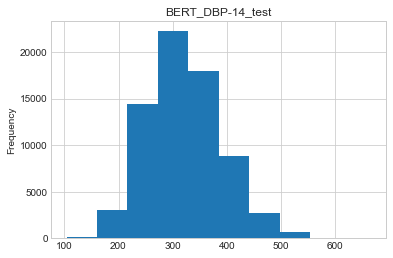

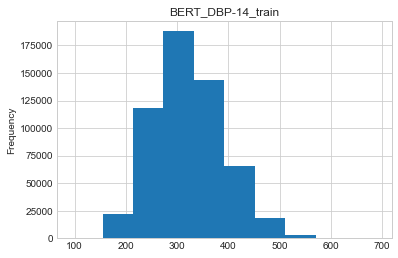

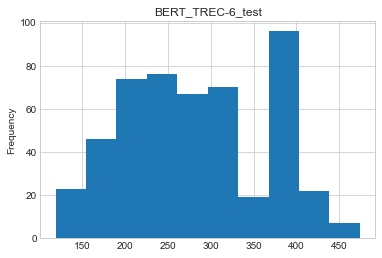

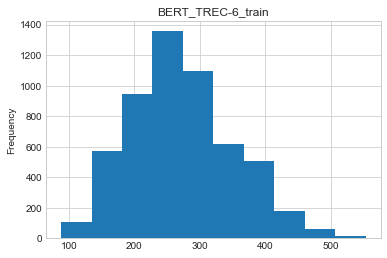

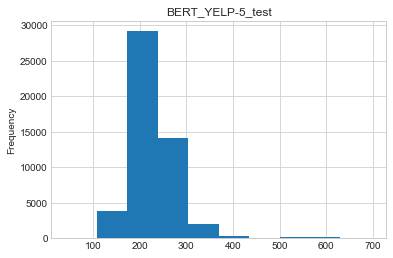

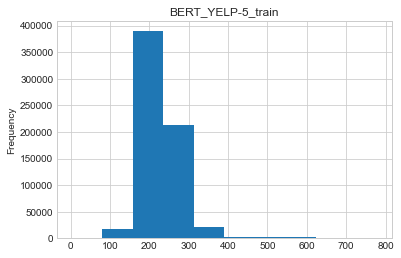

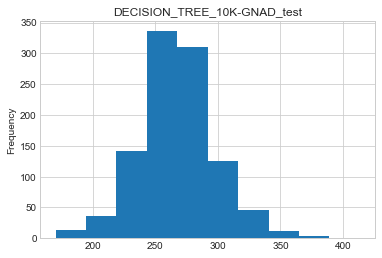

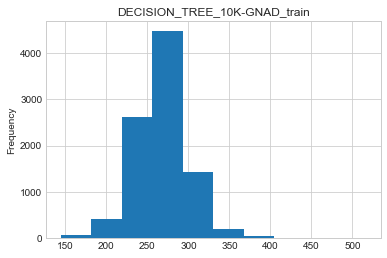

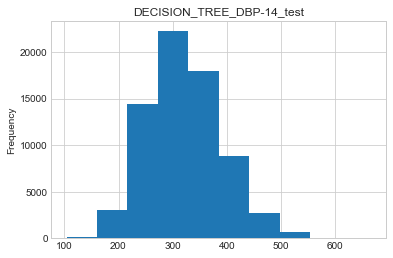

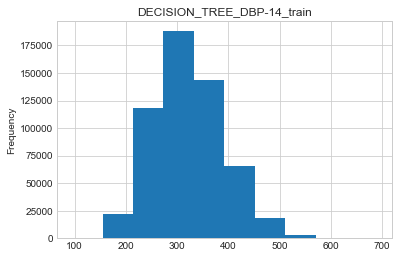

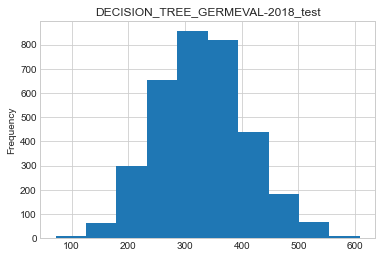

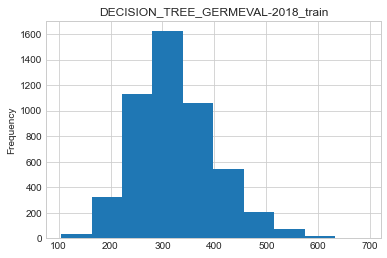

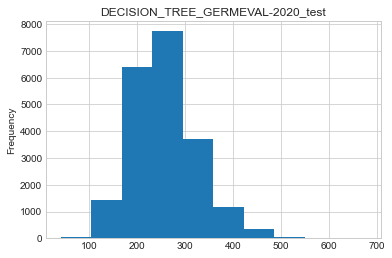

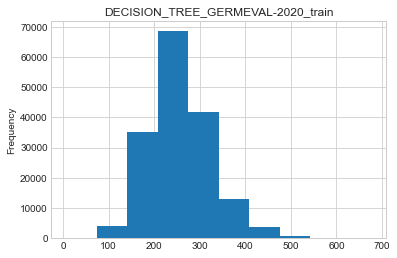

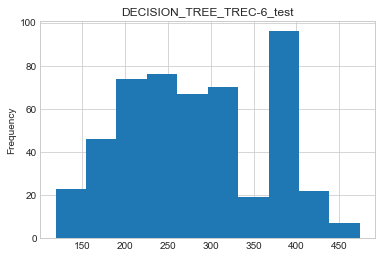

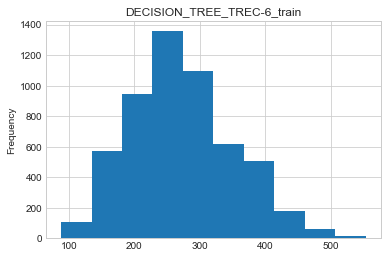

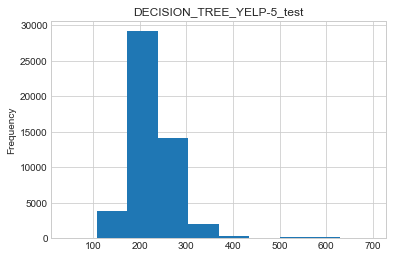

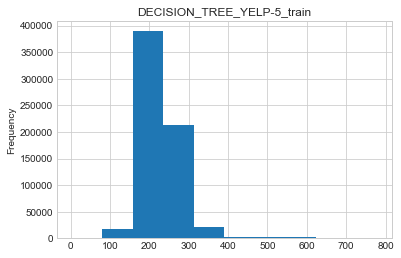

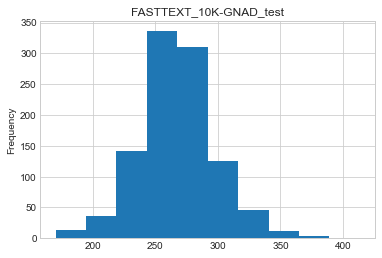

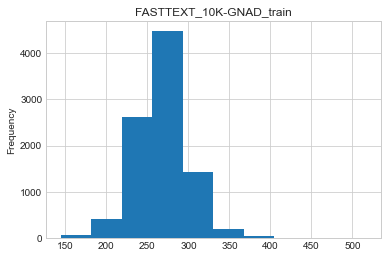

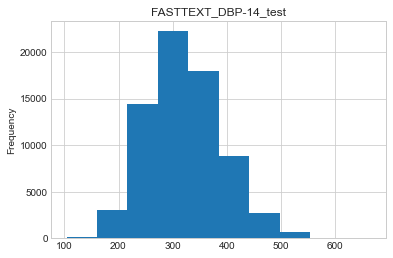

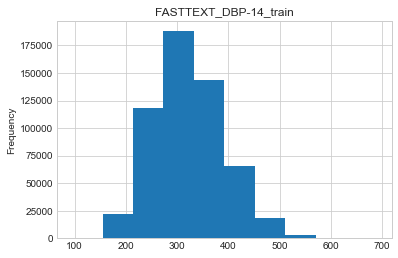

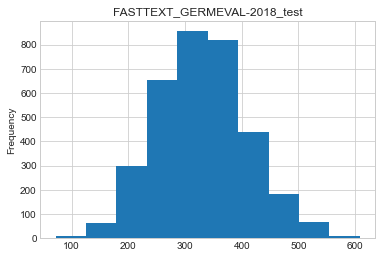

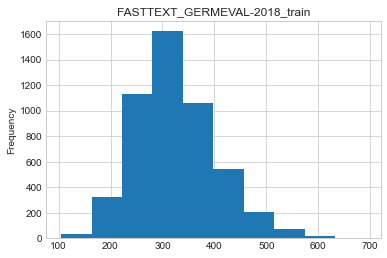

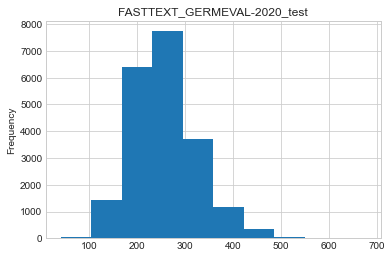

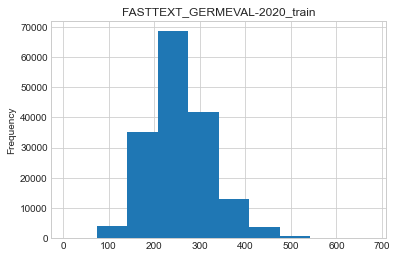

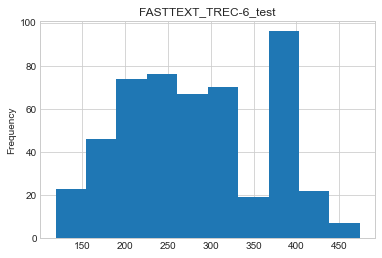

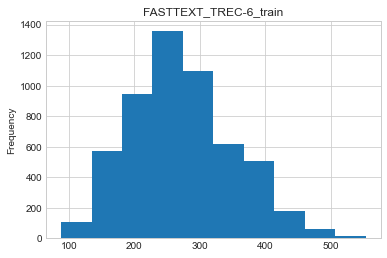

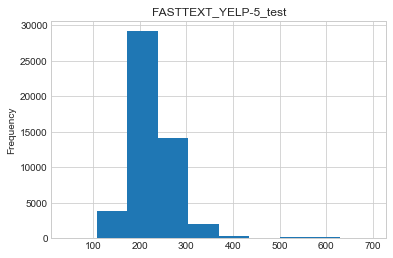

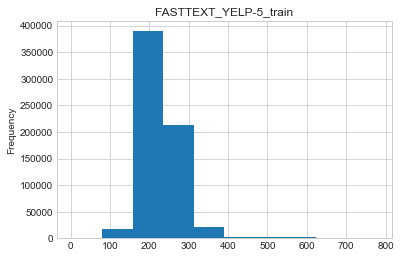

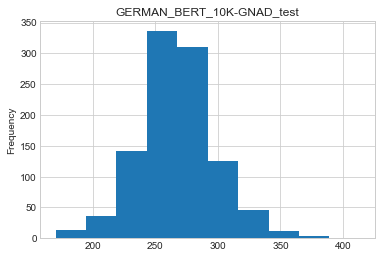

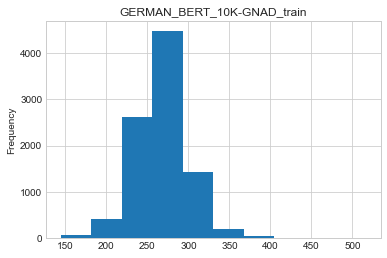

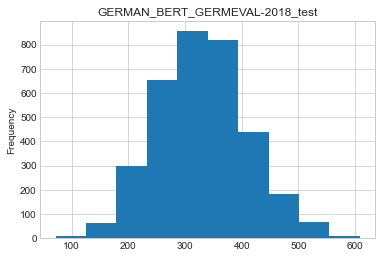

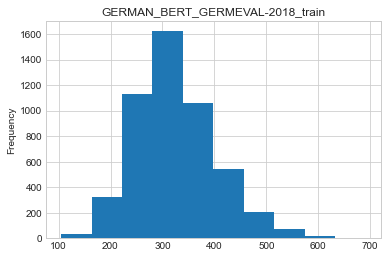

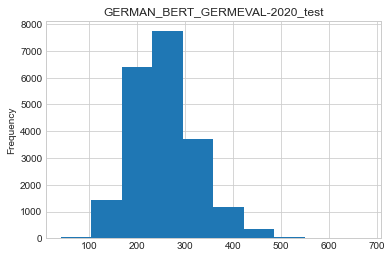

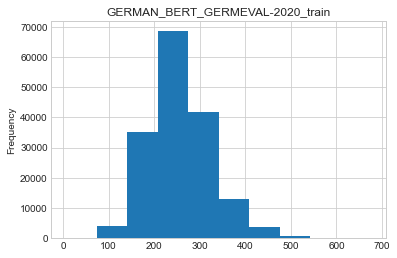

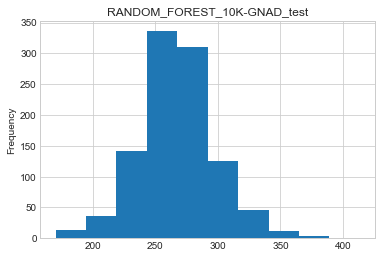

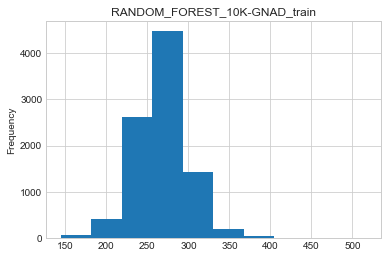

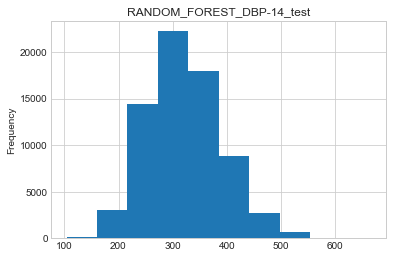

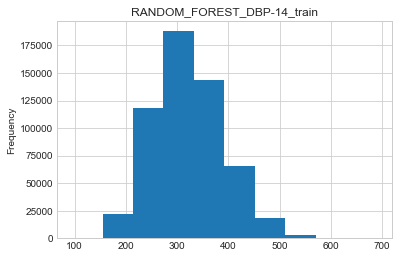

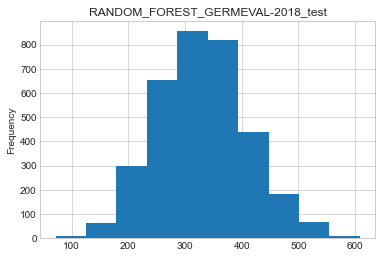

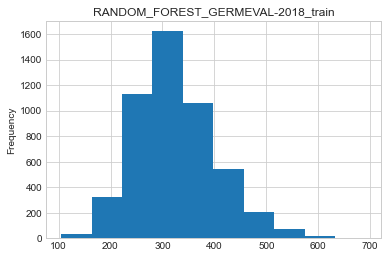

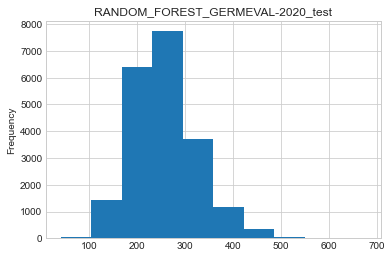

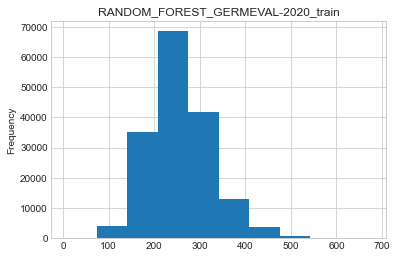

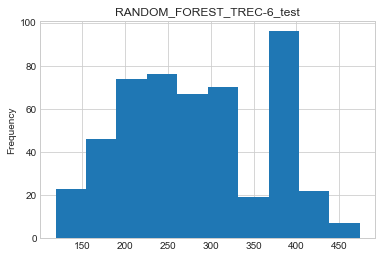

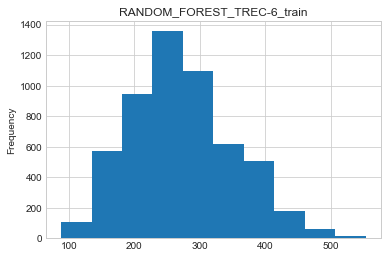

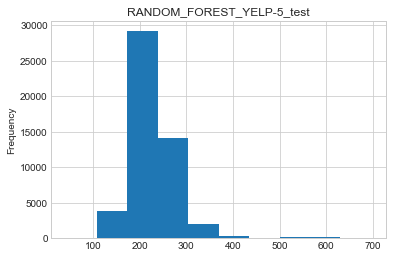

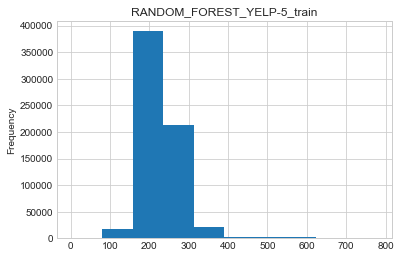

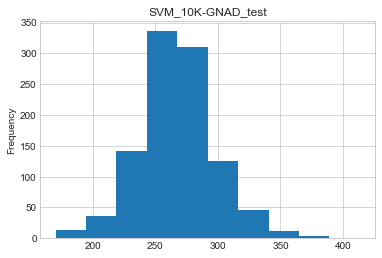

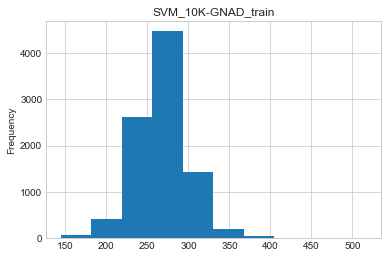

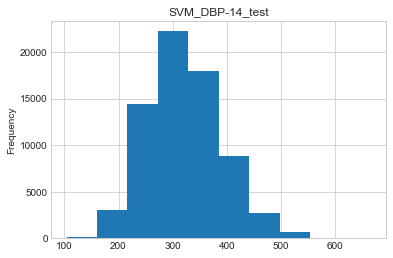

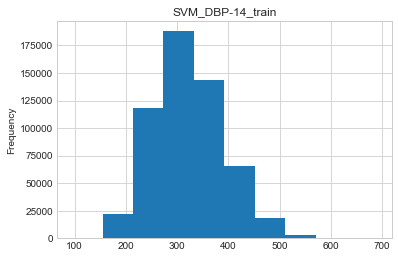

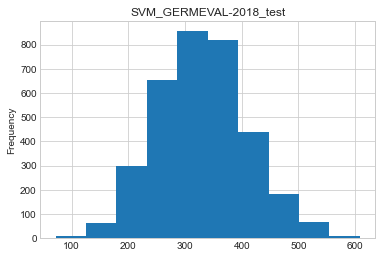

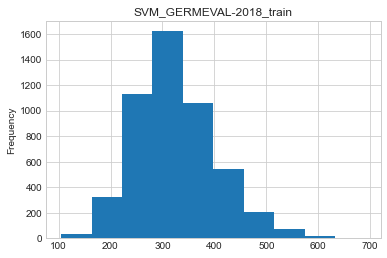

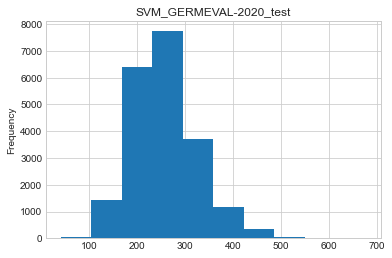

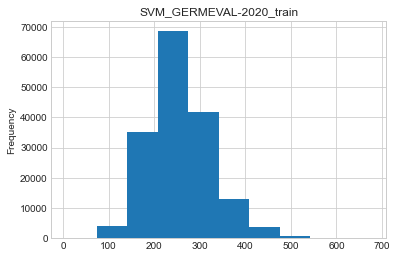

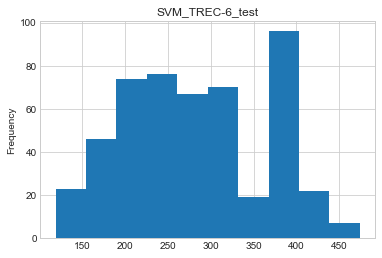

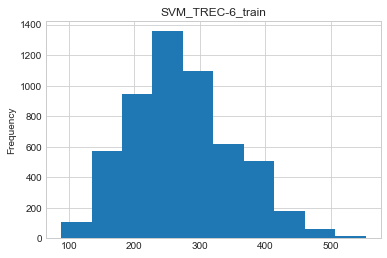

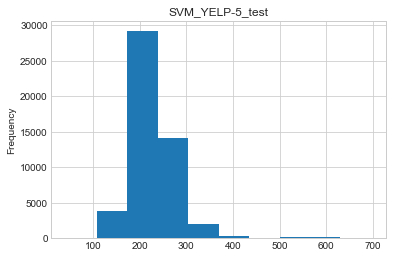

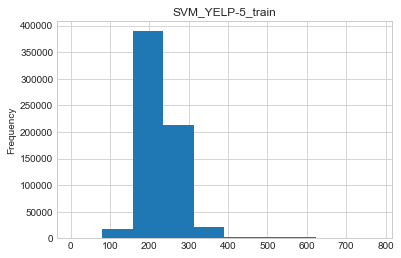

<Figure size 432x288 with 0 Axes>

In [7]:
for ds in df_confs.keys():
    wsc = df_confs[ds]['winnetka']
    wsc.plot(kind='hist', title=ds)
    plt.figure()
    print('-'*60)
    print(ds)
    print(wsc.describe())